In [1]:
-

                perf_name                                        description  \
0     The Infernal Comedy  John Malkovich makes his UMS debut portraying ...   
1        Yuja Wang, piano  Chinese pianist Yuja Wang combines the spontan...   
2     London Philharmonic  The London Philharmonic returns for its first ...   
3        Hamburg Symphony  In 1971, French composer Olivier Messiaen was ...   
4    Chicago Symphony Orc  Wind players of the Chicago Symphony come toge...   
5    San Francisco Sympho  Michael Tilson Thomas and the San Francisco Sy...   
6      Pavel Haas Quartet  “The world’s most exciting string quartet? Wel...   
7        Ballet Preljocaj  Few audience members in attendance at Ballet P...   
8             Joshua Bell  Often referred to as a “poet of the violin,” J...   
9          Murray Perahia  In the more than 35 years he has been performi...   
10    Mariinsky Orchestra  The Mariinsky Orchestra and Valery Gergiev ret...   
11   Detroit Symphony Orc  A concert cre

c:\Users\Xinyu\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# Extract bigram matrix
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

vect = CountVectorizer(ngram_range=(1, 1), stop_words = ENGLISH_STOP_WORDS, min_df = 2)
X = vect.fit_transform(df_perf.description.values)

print X.shape

(143, 1750)


In [3]:
# Latent Dirichlet Allocation

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=5, max_iter=10)
y = lda.fit_transform(X)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print

print_top_words(lda, vect.get_feature_names(), 20)

df_perf['topic'] = np.argmax(y, 1)

Topic #0:
music new flamenco york american voice dance concert times year century jazz musical ums composers performed forsythe art works program
Topic #1:
music ali khan great international stage world guitar best hailed remaining hand native ecstatic ums musicians late figure voice hear
Topic #2:
ums ballet music theatre national company performance michigan london dance seats available partnership award director theater aspen world audiences new
Topic #3:
play new london presented graham theater takes high theatre world national james definition broadcasts michigan partnership stage music ill life
Topic #4:
jazz lincoln center orchestra music new ensemble musical live concert band years philharmonic york audiences brazil including performance ums performs



In [4]:
df_perf.groupby('topic').describe()

count_tck_amt  max_num_seats  max_per_seat   max_tck_amt  \
topic                                                                   
0     count      44.000000      44.000000     44.000000     44.000000   
      mean      843.250000      33.454545     50.931818   1024.804545   
      std      1104.668931      63.232482     22.722182   2313.657580   
      min        17.000000       4.000000      0.000000      0.000000   
      25%       280.000000       7.750000     40.000000    215.375000   
      50%       425.000000      18.000000     46.000000    366.000000   
      75%       993.250000      31.500000     60.000000    774.000000   
      max      5540.000000     392.000000    120.000000  14960.000000   
1     count      23.000000      23.000000     23.000000     23.000000   
      mean      779.565217      23.086957     53.217391    649.804348   
      std       433.288464      15.039080     14.362060    462.807189   
      min        88.000000       5.000000     22.000000    180.000000   
      25%       517.000000      12.000000     47.000000    324.000000   
      50%       784.000000      18.000000     48.000000    476.000000   
      75%      1005.000000      27.000000     65.000000    862.500000   
      max      1604.000000      57.000000     75.000000   1938.000000   
2     count      23.000000      23.000000     23.000000     23.000000   
      mean      607.608696      20.565217     37.304348    589.808696   
      std       772.257125      27.284405     21.866194   1138.274604   
      min        22.000000       3.000000      0.000000      0.000000   
      25%       122.500000       6.500000     22.000000    107.000000   
      50%       218.000000      10.000000     22.000000    220.000000   
      75%       781.500000      23.000000     52.000000    531.750000   
      max      2977.000000     131.000000     85.000000   5567.500000   
3     count      32.000000      32.000000     32.000000     32.000000   
      mean      589.375000      23.375000     48.718750    697.368750   
      std       454.949891      21.276596     26.031289    786.935843   
      min        22.000000       4.000000     22.000000     72.000000   
      25%       251.750000      10.750000     34.000000    255.000000   
      50%       473.000000      17.500000     47.000000    395.000000   
      75%       873.500000      30.000000     57.000000    870.000000   
      max      1714.000000     100.000000    150.000000   3600.000000   
4     count      21.000000      21.000000     21.000000     21.000000   
      mean      803.047619      38.523810    100.095238   1198.338095   
      std       697.037264      42.935555    206.679197   1556.457194   
      min       237.000000       6.000000     35.000000    175.000000   
      25%       425.000000      10.000000     48.000000    336.000000   
      50%       562.000000      27.000000     50.000000    581.400000   
      75%       986.000000      40.000000     60.000000   1125.000000   
      max      3267.000000     177.000000   1000.000000   6619.800000   

             mean_num_seats  mean_per_seat  mean_tck_amt  
topic                                                     
0     count       44.000000      44.000000     44.000000  
      mean         2.010879      32.134989     61.980736  
      std          0.585218      13.257266     21.111864  
      min          1.314286       0.000000      0.000000  
      25%          1.802997      26.129678     52.427485  
      50%          1.888310      30.538568     59.668513  
      75%          2.064257      36.366378     70.341764  
      max          5.480226      82.857143    118.710638  
1     count       23.000000      23.000000     23.000000  
      mean         1.978016      32.301704     63.148876  
      std          0.185894       6.832478     10.530013  
      min          1.726891      18.886364     39.094828  
      25%          1.832601      27.899189     56.948451  
      50%          1.996536      31.404611     63.171001  
  

## Plots

### Distribution of the number of performances for each topic

c:\Users\Xinyu\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
c:\Users\Xinyu\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


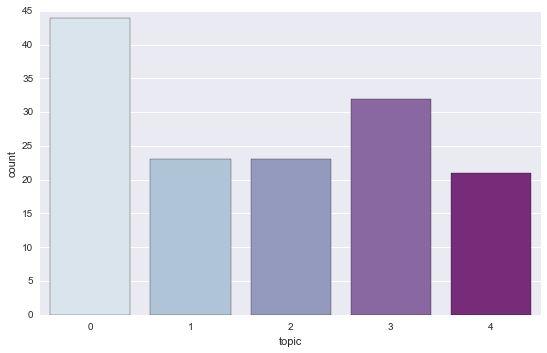

In [5]:
import seaborn as sns
topic_range = range(5)
sns.factorplot(x = 'topic', data = df_perf, kind = 'count', palette="BuPu", size=5, aspect=1.5, order = topic_range)

### Mean ticket amount per seat for each topic

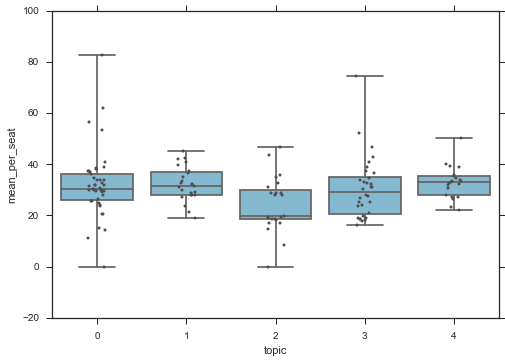

In [6]:
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="topic", y="mean_per_seat", data=df_perf, whis=np.inf, color="c", order=topic_range)
sns.stripplot(x="topic", y="mean_per_seat", data=df_perf, jitter=True, size=3, color=".3", linewidth=0, order=topic_range)

### Max ticket amount per seat for each topic

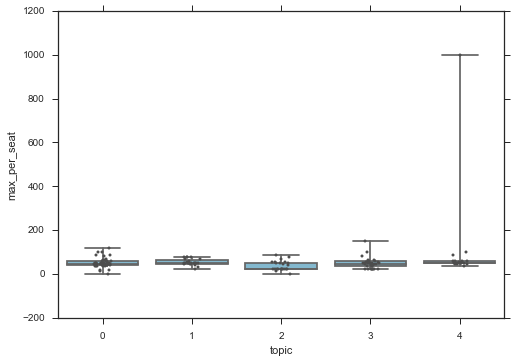

In [7]:
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="topic", y="max_per_seat", data=df_perf, whis=np.inf, color="c", order=topic_range)
sns.stripplot(x="topic", y="max_per_seat", data=df_perf, jitter=True, size=3, color=".3", linewidth=0, order=topic_range)

### Ticket amount per seat for each topic

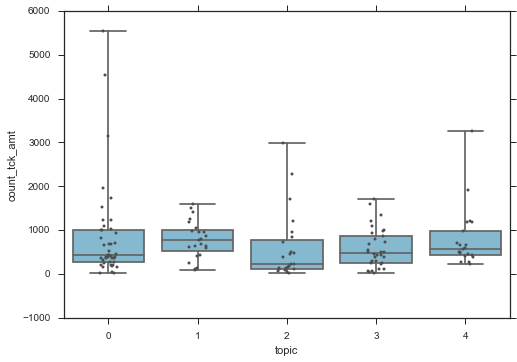

In [8]:
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="topic", y="count_tck_amt", data=df_perf, whis=np.inf, color="c", order=topic_range)
sns.stripplot(x="topic", y="count_tck_amt", data=df_perf, jitter=True, size=3, color=".3", linewidth=0, order=topic_range)

### Plot the preference in topics for each account

In [16]:
df_tmp = df_perf[['perf_name', 'topic']]
df2 = pd.merge(df, df_tmp, on='perf_name')
df2_group_by_acct_no = df2.groupby(['UMS_acct_no', 'topic'])
df_perf_group_by_topic = df_perf.groupby('topic')

In [61]:
account_topic_count = df2_group_by_acct_no.size()
topic_count = df_perf_group_by_topic.size()

In [85]:
account_fav_topic = []

for acc in df2.UMS_acct_no.unique():
    tmp_topic_count = account_topic_count[acc]
    tmp_prop_topic = []
    for idx in tmp_topic_count.index:
        tmp_prop_topic.append(tmp_topic_count[idx]/topic_count[idx])
    account_fav_topic.append([acc, tmp_topic_count.index[tmp_prop_topic.index(max(tmp_prop_topic))]])

In [86]:
account_fav_topic

[[1111, 0],
 [1115, 0],
 [1131, 0],
 [1153, 0],
 [1166, 0],
 [1174, 0],
 [1181, 0],
 [1182, 0],
 [1186, 0],
 [1201, 0],
 [1217, 0],
 [1224, 0],
 [1248, 0],
 [1269, 0],
 [1301, 0],
 [1302, 0],
 [1306, 0],
 [1308, 0],
 [1323, 0],
 [1327, 0],
 [1329, 0],
 [1338, 0],
 [1340, 0],
 [1344, 0],
 [1355, 0],
 [1365, 0],
 [1372, 0],
 [1375, 0],
 [1382, 0],
 [1389, 0],
 [1392, 0],
 [1406, 0],
 [1431, 0],
 [1472, 0],
 [1535, 0],
 [1551, 0],
 [1552, 0],
 [1553, 0],
 [1579, 0],
 [1585, 0],
 [1596, 0],
 [1598, 0],
 [1613, 0],
 [1621, 0],
 [1627, 0],
 [1631, 0],
 [1657, 0],
 [1677, 0],
 [1702, 0],
 [1703, 0],
 [1740, 0],
 [1742, 0],
 [1770, 0],
 [1772, 0],
 [1785, 0],
 [1792, 0],
 [1793, 0],
 [1797, 0],
 [1803, 0],
 [1812, 0],
 [1813, 0],
 [1815, 0],
 [1832, 0],
 [1848, 0],
 [1855, 0],
 [1856, 0],
 [1879, 0],
 [1885, 0],
 [1889, 0],
 [1940, 0],
 [1945, 0],
 [1990, 0],
 [2018, 0],
 [2025, 0],
 [2038, 0],
 [2050, 0],
 [2064, 0],
 [2067, 0],
 [2076, 0],
 [2081, 0],
 [2105, 0],
 [2109, 0],
 [2111, 0],
 [21

In [68]:
print df2.UMS_acct_no.unique()


[  1111   1115   1131 ..., 237006 261079 206548]
